<a href="https://colab.research.google.com/github/wenshanliu-slu0/hds5210-2023/blob/main/final/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Long term care system in Maryland State.**

## **Introduction:**
Long-term care analysis is critical for a number of reasons, the most important of which are the aging population and the possible financial load associated with longer healthcare demands. Therefore, I want to do a visual analysis of long-term care facilities and nursing homes to gain a comprehensive understanding of the quality of care provided in our society.

In this report, Maryland State will be used as an example. First of all, there are three datasets will be used in this project. They will be imported to Python by using database connection, api connection, and local file uploaded.

Secondly, according to those data, the program will caculate key indexs. For example, the bed supply rate of nursing houses in each county. This information will aid in identifying counties in Maryland that may require an expansion of long-term care facilities.

Finally, the program will present the obtained data through visualizations to enhance clarity and understanding. In this project, it shows three different data visualizations.  

This report will provide relevant authorities with the current aging situation in each county in MD State. In addition, the visually presented map will provide information on senior care centers and geriatric hospitals in each region.


**Dataset List:**

1)Population in MD State in 2020-2022.

Link:https://www.census.gov/data/datasets/time-series/demo/popest/2020s-counties-detail.html

2)Maryland Long Term Care Assisted Living - Long Term Care

Link: https://data.imap.maryland.gov/datasets/maryland::maryland-long-term-care-assisted-living-long-term-care/explore?location=38.846676%2C-77.306000%2C8.94

3)Maryland Long Term Care Assisted Living - Geriatric Care Hospitals

Link: https://data.imap.maryland.gov/datasets/2d33670813aa4e1e84bcec0c12773ba2_2/explore




 **Part I. To get the datasets.**

Firstly, the program will use differt ways to get those three datasts.


1.   database connection
2.   api connection
3.   local file (csv)






In [1]:
"""
In this cell, the program will connect to the MySQL Server which is at the GCP.  (The server of Mysql is created at GCP Cloud SQL, GCP Project id = slu-hds5210 )
Then the SQL command will get the data of the poplation in Maryland State in 2023.
After got the data in python, the program would clean data make sure the data can be used easly later.

request dataset1:
1. using Mysql connection.
2. clean data: to remove the string 'County' in [CTYNAME]. For exapmle: Allegany State -> Allegany
"""

!pip install pymysql
import pymysql
import pandas as pd

#1.
#SQL connection information
conn = pymysql.connect(host="34.171.30.129",user='workbench',password='1234',database='newdb')

#SQL qury command
query = 'SELECT STATE, CTYNAME, AGE65PLUS_TOT,POPESTIMATE,AGE65PLUS_MALE,AGE65PLUS_FEM \
        FROM newdb.`cc-est2022-agesex-24` WHERE STATE =24 AND YEAR = 4 ;'

mysql_result_dataFrame = pd.read_sql(query,conn)

#2.
#clean data
mysql_result_dataFrame['CTYNAME'] = mysql_result_dataFrame['CTYNAME'].str.replace(' County', '')
print(mysql_result_dataFrame)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 1.0 MB/s eta 0:00:00
    STATE          CTYNAME  AGE65PLUS_TOT  POPESTIMATE  AGE65PLUS_MALE  \
0      24         Allegany          14185        67267            6333   
1      24     Anne Arundel          96019       593286           42867   
2      24        Baltimore         156497       846161           66306   
3      24          Calvert          15601        94573            7141   
4      24         Caroline           5915        33433            2665   
5      24          Carroll          31678       175305           14253   
6      24            Cecil          18175       104942            8505   
7      24          Charles          23629       170102           10206   
8      24       Dorchester           7560        32726            3347   
9      24        Frederick          44554       287079           19914   
10     24          Garrett           6899        28579            3266   
11     24          Harford      

<ipython-input-1-057991a72e26>:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  mysql_result_dataFrame = pd.read_sql(query,conn)


In [2]:
"""
In this cell, the program will call api from Maryland.gov. Then, the program will get long term care assisted living information which is a JSON forate data.
In this data set, it shows the assisted living facilities infomation, such as address, longtitue, latitude, capacity etc.
After get the data, the program would do the simple data transformation before calcuation and data visulation.



# 1.request dateset2 by using calling api
# 2.data transformation (rename column, drop column, add new column)
# note: The 'map_use' field is used to determine which data set it comes from and can be visually presented based on the map

"""

import requests
import pandas as pd
import matplotlib.pyplot as plt

url = "https://geodata.md.gov/imap/rest/services/Health/MD_LongTermCareAssistedLiving/FeatureServer/6/query?where=1%3D1&outFields=*&outSR=4326&f=json"

try:
    response = requests.get(url)
    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        data = response.json()
        # Now 'data' contains the JSON response from the API
        # 2. Read data
        features = data.get('features', [])
        records = [feature.get('attributes', {}) for feature in features]
        df_LTCLiving = pd.DataFrame(records)
        #print(df_LTCLiving)
    else:
        print(f"Error: {response.status_code}")

except requests.exceptions.RequestException as e:
    print(f"Request error: {e}")


#To rename columns , drop unuseless columns, and add columns

df_LTCLiving.rename(columns={'XCoordinate': 'Longtitude'}, inplace=True)
df_LTCLiving.rename(columns={'YCoordinate': 'Latitude'}, inplace= True)

df_LTCLiving.drop(['OHCQ_Index_No_','OBJECTID'] ,axis=1 ,inplace=True)

#add column 'Map_use'. This is a column to recogize the data is from dataset 2 or dataset 3.
#value = 0 -> dataset2 , value =1 -> dataset3
df_LTCLiving['Map_use']= 0


#print the result
print(df_LTCLiving)


              County                                   Facility_Name  \
0           Allegany               Allegany Health Nursing and Rehab   
1           Allegany  Devlin Manor Nursing and Rehabilitation Center   
2           Allegany                               Egle Nursing Home   
3           Allegany              Sterling Care at Frostburg Village   
4           Allegany                    Cumberland Healthcare Center   
..               ...                                             ...   
222          Charles                                  Waldorf Center   
223        Frederick                          Ballenger Creek Center   
224           Howard          The Lutheran Village at Miller's Grant   
225       Montgomery                          Ingleside at King Farm   
226  Prince George's                               Riderwood Village   

                          Facility_Address  Facility_City Facility_State  \
0                       730 Furnace Street     Cumberland  

In [3]:
"""
In this cell, the program will get the csv local file. The local file is provied by Maryland.gov.
In this dataset provide the information of getiatic care hospitals.
After get the data, the program would do the simple data transformation before calcuation and data visulation.



# dataset3
#1.import a csv file from lcoal machine
# 2.data transformation (rename column, drop column, add new column)
# note: The 'map_use' field is used to determine which data set it comes from and can be visually presented based on the map
"""

import pandas as pd
import io

df_LTCHospital = pd.read_csv('Maryland_Long_Term_Care_Assisted_Living_-_Geriatric_Care_Hospitals.csv')
#print(df_LTCHospital)


#To rename columns , drop columns , and new a colmns to recoginze
df_LTCHospital.rename(columns={'XCoordinate':'Longtitude'}, inplace = True)
df_LTCHospital.rename(columns={'YCoordinate':'Latitude'}, inplace = True)

df_LTCHospital.drop(['X', 'Y' ,'MIEMSS_Region', 'OHCQ_Index_No_', 'OBJECTID'] , axis=1, inplace = True)

#add column 'Map_use'. This is a column to recogize the data is from dataset 2 or dataset 3.
#value = 0 -> dataset2 , value =1 -> dataset3
df_LTCHospital['Map_use']= 1

print(df_LTCHospital)

#df_LTCHospital.info()


            County                                      Facility_Name  \
0       Washington                            Western Maryland Center   
1   Baltimore City       Levindale Hebrew Geriatric Center & Hospital   
2         Wicomico                                 Deer's Head Center   
3  Prince George's  Spellman Specialty Hospital And Nursing Care C...   

                Facility_Address Facility_City Facility_State  Facility_Zip  \
0       1500 Pennsylvania Avenue    Hagerstown             MD         21742   
1     2434 West Belvedere Avenue     Baltimore             MD         21215   
2  315 Deer'S Head Hospital Road     Salisbury             MD         21802   
3            3001 Hospital Drive      Cheverly             MD         20785   

  Facility_Phone  License_Capacity  Longtitude  Latitude  Map_use  
0   301-745-4140                60    -77.7175   39.6656        1  
1   410-466-8700               100    -76.6651   39.3545        1  
2   410-543-4000                 0

**Part II. date calculation part**

In the section, 3 function would be created and be used to calcuate the specific value. Some of them would do data merage when using two data frame.

--------------------------------------------------------------------------

*   calc_elders_rate: This function is used to calculate the proportion of elderly people over 65 years old in each county to the total population of the county. This allows us to know which county has a severe aging population.



*   calc_male_to_female: This function is used to calculate the proportion of men and women over 65 years old in each county.



*   calc_bed_occupancy_rate: This function calculates the bed supply rate of nursing houses in each county. Calculation method: The number of nursing beds available for every 1,000 older adults in the area. The higher the value, the greater the number of nursing home beds in the area.






In [4]:
def calc_elders_rate(result_dataFrame):
  """ (pd.dataframe) -> pd.dataframe
  This function is used to calculate the proportion of elderly people over 65 years old in each county to the total population of the county by using the aggregate method.
  At last, the program will return a new dataframe which has two columns. (1)County Name (2) The ratio of the elders

  """
  #aggregate :groupby county column , sumup age over 65 population and all population
  df_elders_rate = result_dataFrame.groupby('CTYNAME')[['AGE65PLUS_TOT', 'POPESTIMATE']].sum()

  # Reset the index
  df_elders_rate.reset_index(inplace=True)


  # Calculate the ratio
  df_elders_rate['AGE65PLUS_RATIO'] = df_elders_rate['AGE65PLUS_TOT'] / df_elders_rate['POPESTIMATE']

  return(df_elders_rate[['CTYNAME', 'AGE65PLUS_RATIO']])


#test function
df_age65_ratio_result = calc_elders_rate(mysql_result_dataFrame)
print(df_age65_ratio_result)


            CTYNAME  AGE65PLUS_RATIO
0          Allegany         0.210876
1      Anne Arundel         0.161843
2         Baltimore         0.184949
3    Baltimore city         0.156807
4           Calvert         0.164963
5          Caroline         0.176921
6           Carroll         0.180702
7             Cecil         0.173191
8           Charles         0.138911
9        Dorchester         0.231009
10        Frederick         0.155198
11          Garrett         0.241401
12          Harford         0.175376
13           Howard         0.154297
14             Kent         0.281573
15       Montgomery         0.172260
16  Prince George's         0.152581
17     Queen Anne's         0.207364
18         Somerset         0.180885
19       St. Mary's         0.141760
20           Talbot         0.305389
21       Washington         0.182396
22         Wicomico         0.170316
23        Worcester         0.290072


In [5]:
def calc_male_to_female(mysql_result_dataFrame):
  """ (pd.dataframe)-> float, float
  This function is used to calculate the proportion of men and women over 65 years old in each county by usingthe aggreate method.
  At last, the program will return two float values. (1)the percentage of over 65 yrs old male (2) the percentage of over 65 yrs old female

  """
  #use aggraeted to sum up 'AGE65PLUS_MALE' , 'AGE65PLUS_FEM '
  aggregated_df = mysql_result_dataFrame.groupby('STATE').agg({'AGE65PLUS_MALE': 'sum' , 'AGE65PLUS_FEM': 'sum'})

  # Calculate total for each gender
  total_male = aggregated_df['AGE65PLUS_MALE'].sum()
  total_female = aggregated_df['AGE65PLUS_FEM'].sum()

  # Calculate percentages
  percent_male = (aggregated_df['AGE65PLUS_MALE'] / (total_male +total_female)) * 100
  percent_female = (aggregated_df['AGE65PLUS_FEM'] / (total_male +total_female) ) * 100

  #print(percent_male) #43.8
  #print(percent_female) #56.1

  return percent_male, percent_female


#Test the function
result = calc_male_to_female(mysql_result_dataFrame)
percent_male, percent_female = result



In [6]:

def calc_bed_occupancy_rate(mysql_result_dataFrame,df_LTCLiving):
  """ (pd.datafrmae, pd.dateframe)->pd.dataframe
  This function calculates the bed supply rate of nursing houses in each county.
  Calculation method: The number of nursing beds available for every 1,000 older adults in the area.
  The higher the value, the greater the number of nursing home beds in the area.

  1. utilize dataframe[df_LTCLiving] and aggregate the total capicity in each county.
  2. use datafrmae [mysql_result_dataFrame] and [df_LTCLiving]. merge two dataframes on county column
  3. calcute the rate.

  """

  #1. use aggregate to sum up df_LTCLiving 'License_Capacity'  by 'County'
  agg_func = {'License_Capacity': 'sum'}
  df_county_capacity = df_LTCLiving.groupby('County').agg(agg_func).reset_index()

  #2.merge two dataframe
  merged_df = pd.merge(mysql_result_dataFrame, df_county_capacity, left_on='CTYNAME', right_on='County')
  # drop the same column
  merged_df = merged_df.drop(columns=['County', 'POPESTIMATE','AGE65PLUS_FEM' ,'AGE65PLUS_MALE'])

  #3. calculate
  #print(df_county_capacity)
  merged_df['Beds_Per_1000'] = (merged_df['License_Capacity'] / merged_df['AGE65PLUS_TOT']) * 1000


  #4. result
  return(merged_df)


#test function
result_df= calc_bed_occupancy_rate(mysql_result_dataFrame,df_LTCLiving)

print(result_df)

    STATE          CTYNAME  AGE65PLUS_TOT  License_Capacity  Beds_Per_1000
0      24         Allegany          14185               908      64.011280
1      24     Anne Arundel          96019              1606      16.725856
2      24        Baltimore         156497               347       2.217295
3      24          Calvert          15601               310      19.870521
4      24         Caroline           5915               187      31.614539
5      24          Carroll          31678               921      29.073805
6      24            Cecil          18175               431      23.713893
7      24          Charles          23629               491      20.779551
8      24       Dorchester           7560               233      30.820106
9      24        Frederick          44554              1082      24.285137
10     24          Garrett           6899               316      45.803740
11     24          Harford          46276               769      16.617685
12     24           Howar

**PartIII. Data Visualization**

In this part, the above-mentioned function calculation results will be used to present data visualizations.

--------------------------------------------------


*   Pie chart: The pie chart will show the male to female ratio of elderly people over 65 years old in Maryland state.

*   Bar-Line chart: The bar line chart shows two metric values. One is the elder rate. The other is the bed supply rate of nursing houses.
The best situation is low elder rate and a high nursing home bed supply rate.

*   Map: This map will present the results of the fusion of two datasets (Maryland Long Term Care Assisted Living, Geriatric Care Hospitals) and use the field 'map_use' to determine whether to display icons of nursing homes or geriatric hospitals.This map visualization will exhibit an aggregation and summation effect upon zooming out.




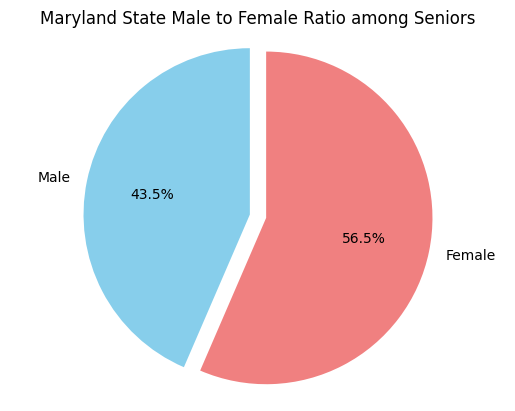

In [7]:
import matplotlib.pyplot as plt


def plot_pie_chart(percent_male,percent_female):

  labels = ['Male', 'Female']
  sizes = [percent_male.sum(), percent_female.sum()]
  colors = ['skyblue', 'lightcoral']
  explode = (0.1, 0)  # explode the 1st slice (Male)

  plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
  plt.axis('equal')
  plt.title('Maryland State Male to Female Ratio among Seniors')

  # Display the pie chart
  plt.show()

#test function
percent_male, percent_female = calc_male_to_female(mysql_result_dataFrame)
plot_pie_chart(percent_male,percent_female)

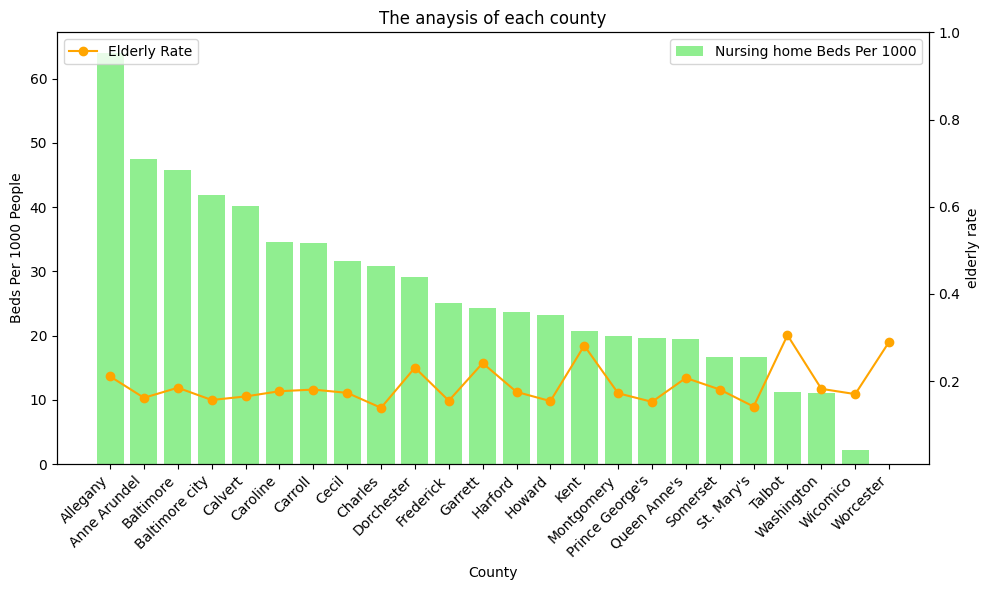

In [8]:

import matplotlib.pyplot as plt

def bar_line_chart(result_df,df_age65_ratio_result):
    """
    bar chart
    """
    #order by desc
    result_df= result_df.sort_values(by='Beds_Per_1000', ascending=False)

     # Create a bar chart with conditional coloring
    plt.figure(figsize=(10, 6))
    bars = plt.bar(result_df['CTYNAME'], result_df['Beds_Per_1000'], color=['lightgreen'])

    plt.xlabel('County')
    plt.ylabel('Beds Per 1000 People')
    plt.title('The anaysis of each county')
    plt.xticks(rotation=45, ha='right')

    # Add a legend for color reference
    legend_labels = ['Nursing home Beds Per 1000']
    plt.legend(bars, legend_labels, loc='upper right')



    """
    line chart
    """
    ax2= plt.twinx()
    ax2.set_ylabel("elderly rate")

    ax2.set_ylim(0.01,1)

    #data from df_elders_rate 'AGE65PLUS_RATIO'
    ax2.plot(df_age65_ratio_result['CTYNAME'], df_age65_ratio_result['AGE65PLUS_RATIO'], color='orange', marker='o', label='Elderly Rate')
    ax2.legend(loc='upper left')



    plt.tight_layout()
    plt.show()


bar_line_chart(result_df,df_age65_ratio_result)


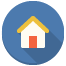
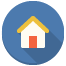
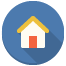
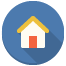
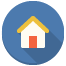
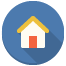
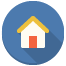
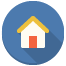
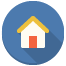
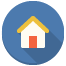
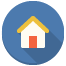
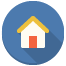
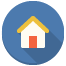
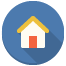
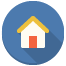
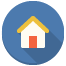
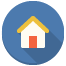
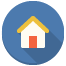
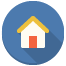
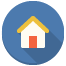
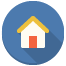
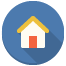
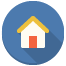
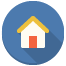
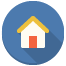
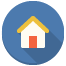
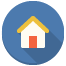
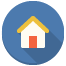
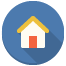
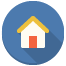
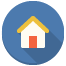
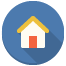
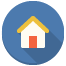
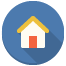
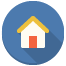
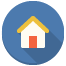
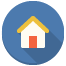
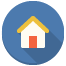
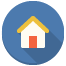
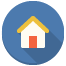
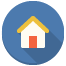
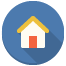
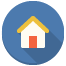
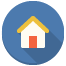
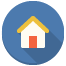
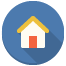
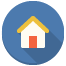
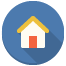
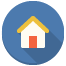
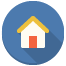
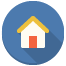
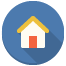
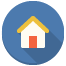
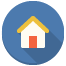
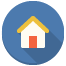
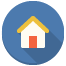
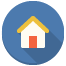
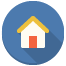
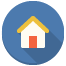
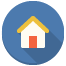
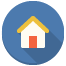
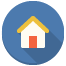
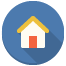
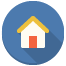
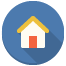
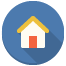
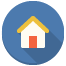
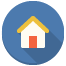
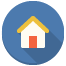
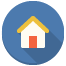
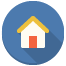
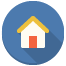
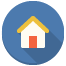
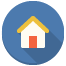
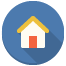
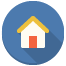
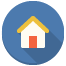
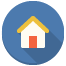
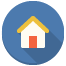
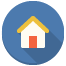
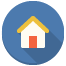
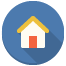
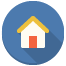
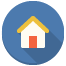
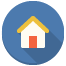
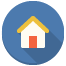
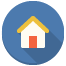
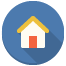
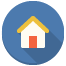
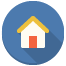
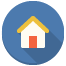
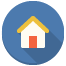
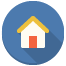
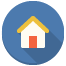
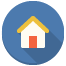
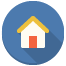
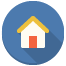
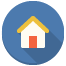
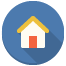
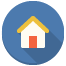
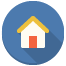
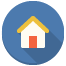
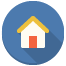
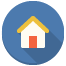
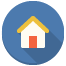
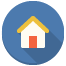
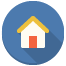
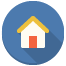
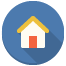
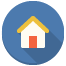
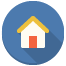
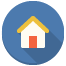
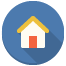
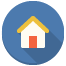
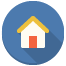
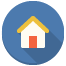
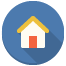
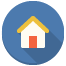
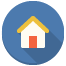
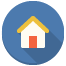
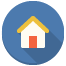
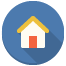
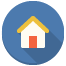
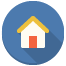
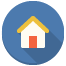
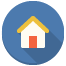
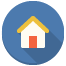
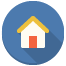
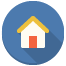
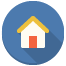
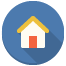
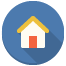
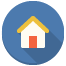
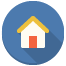
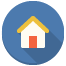
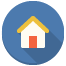
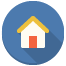
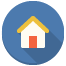
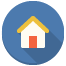
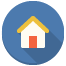
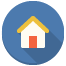
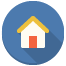
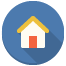
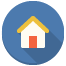
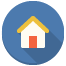
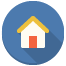
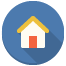
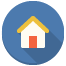
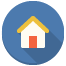
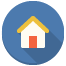
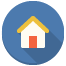
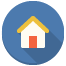
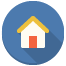
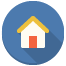
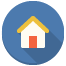
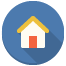
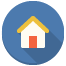
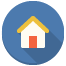
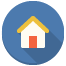
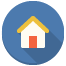
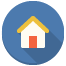
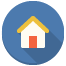
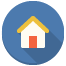
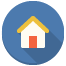
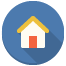
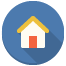
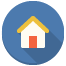
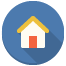
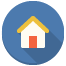
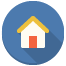
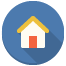
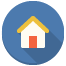
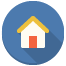
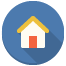
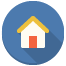
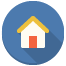
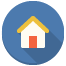
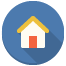
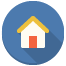
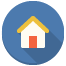
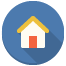
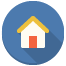
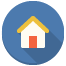
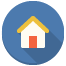
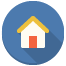
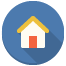
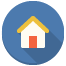
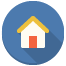
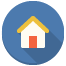
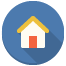
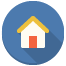
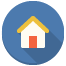
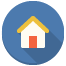
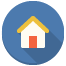
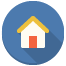
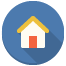
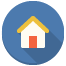
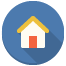
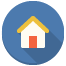
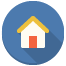
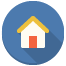
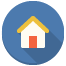
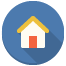
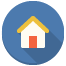
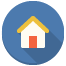
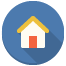
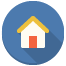
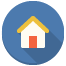
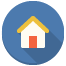
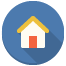
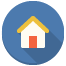
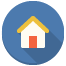
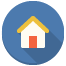
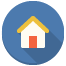
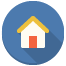
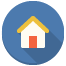
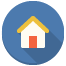
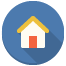
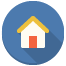
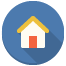
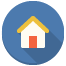
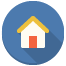
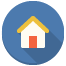
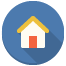
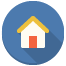
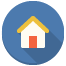
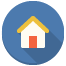
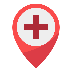
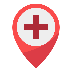
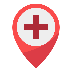
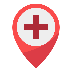

In [9]:
"""
LTC_map(df_LTCLiving, df_LTCHospital)

### The result of map might not show clearly in Github, but it can show in google Colab.


"""
import folium
from folium.plugins import MarkerCluster

# use concat_df dataframe to show the map visulization
def LTC_map(df_LTCLiving, df_LTCHospital):

  # concat dataset2 and dataset3
  concat_df = pd.concat([df_LTCLiving, df_LTCHospital])

  #create map  initize the map
  map = folium.Map(location=[39.5, -78.5], zoom_start=9)

  #create layer which can be add the points
  marker_cluster = MarkerCluster().add_to(map)

  # Add points to the map
  for index, row in concat_df.iterrows():

    lat, lon = row['Latitude'], row['Longtitude']
    #recognize the colomn 'Map_use' to mark different icons
    map_icon = row['Map_use']

    #custom icons
    if map_icon == 0:
          folium.Marker([lat, lon], icon=folium.CustomIcon('home.png')).add_to(marker_cluster)
    else:
          folium.Marker([lat, lon], icon=folium.CustomIcon('hos.png')).add_to(marker_cluster)

  # Display the map
  display(map)
  # download as html file if it can not display on github
  map.save("map.html")


##test
LTC_map(df_LTCLiving, df_LTCHospital)

###**Summary:**
According to the data above, here is some import information we get.


1.   The pie chart shows that the female elder is more than males 13%.
2.   From the bar-line char observation, Worcester County has relatively few long-term care resources.However, the proportion of older adults in the area is as high as 29%.
3. The map shows that there are a total of 231 long-term care centers and geriatric hospitals.

The report provides essential information for authorities by presenting an overview of the aging situation in each Maryland county. It includes critical indices and a visual map, offering decision-makers a comprehensive understanding of long-term care. The report also enriches its content by incorporating details about each region's senior care centers and geriatric hospitals. This information aids authorities in making informed decisions about resource allocation and potential healthcare facility expansion.

To sum up, The research supports Maryland's healthcare stakeholders and policymakers by offering robust contributions to the current conversation about the difficulties an aging population presents.